<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula3b_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X, y = dataset.data, dataset.target
print(X.shape, y.shape)

(569, 30) (569,)


## Verificar distribuição das classes

In [73]:
sum(y)/len(y)

0.6274165202108963

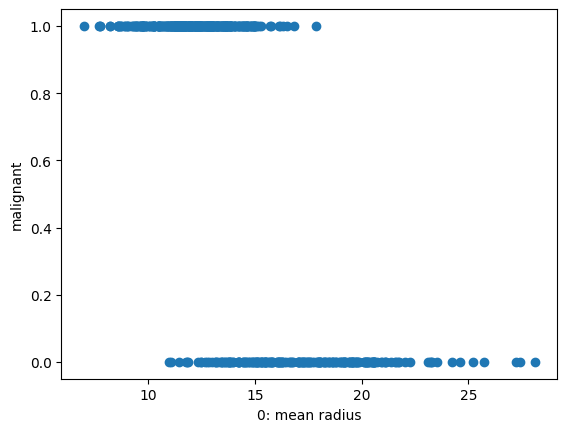

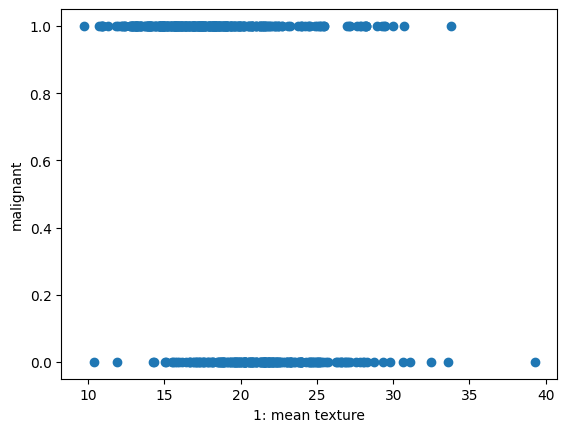

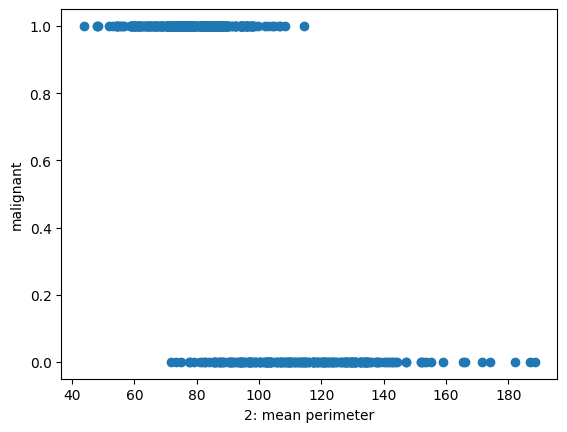

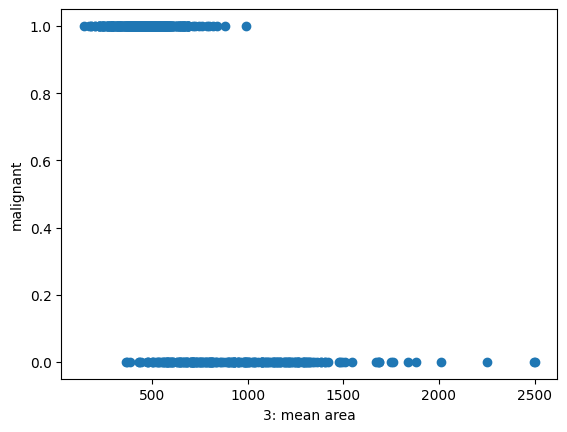

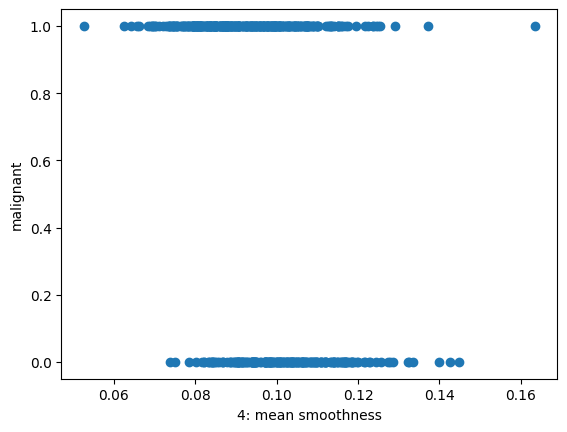

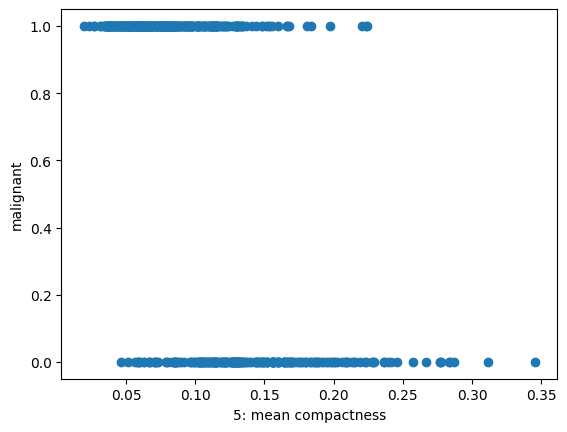

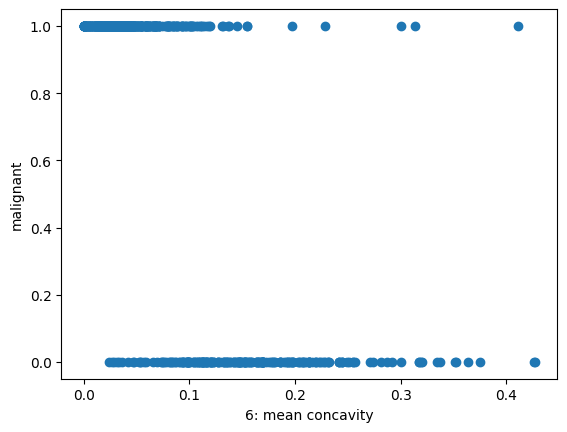

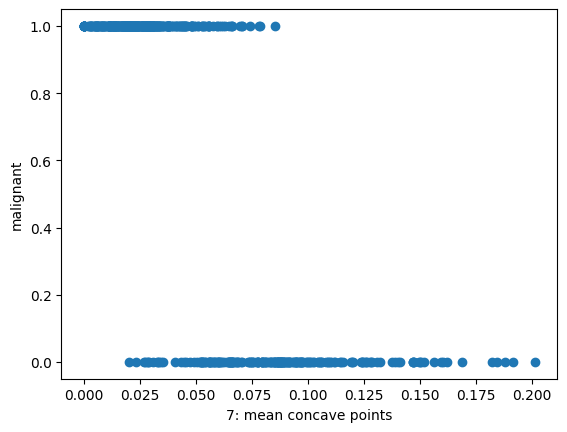

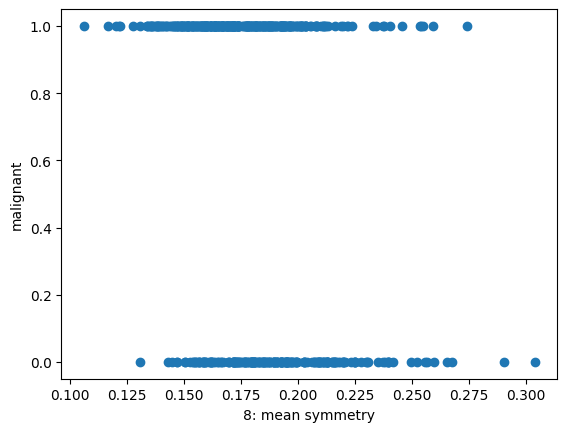

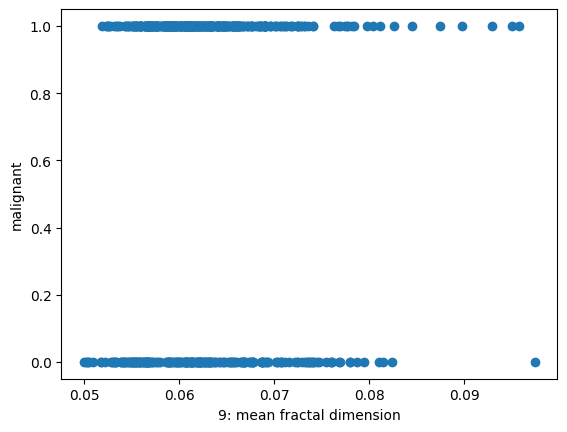

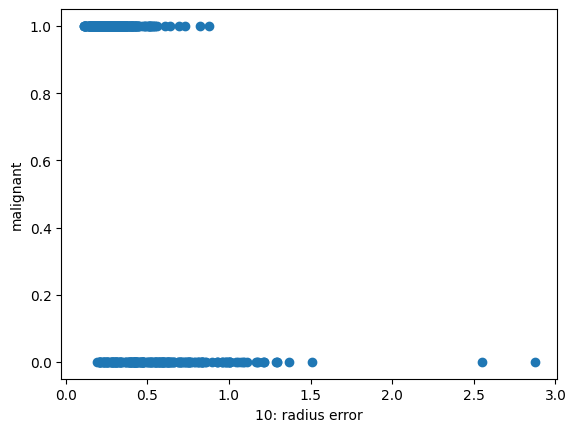

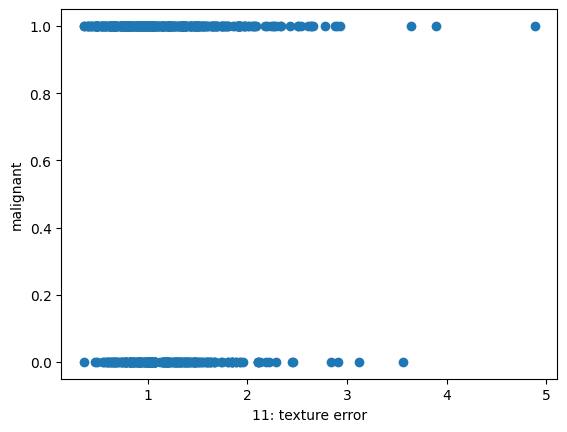

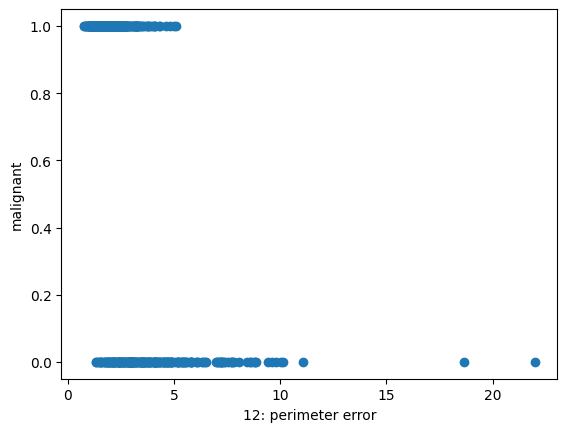

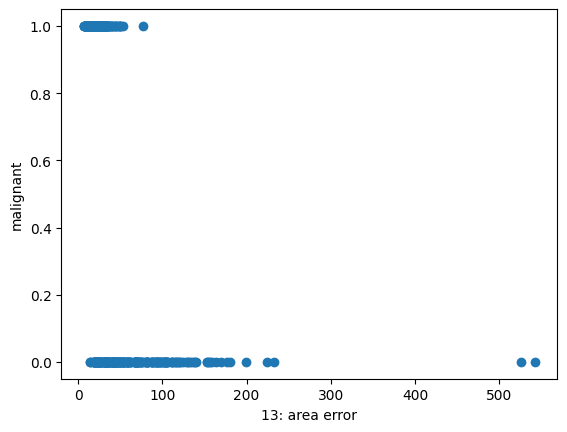

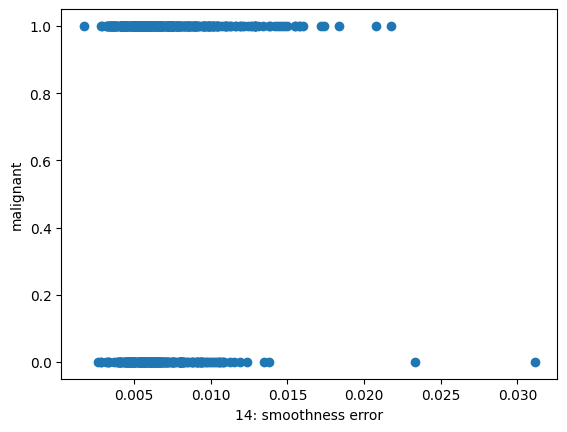

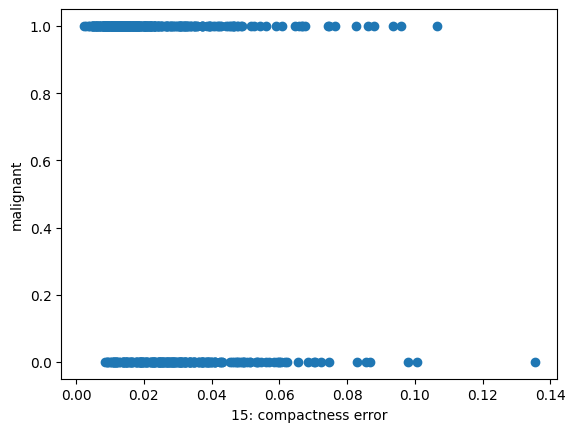

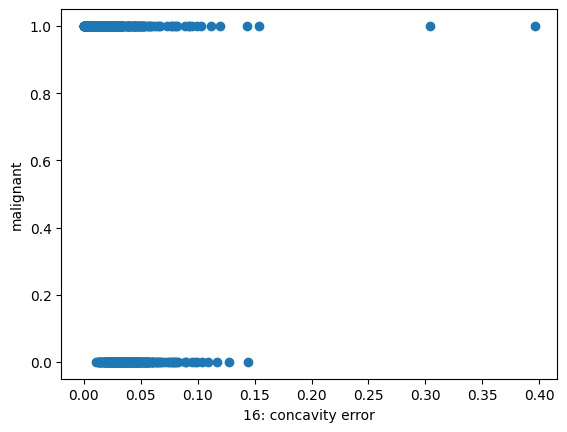

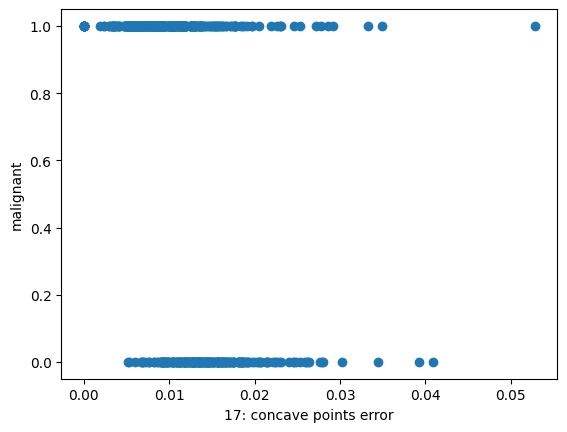

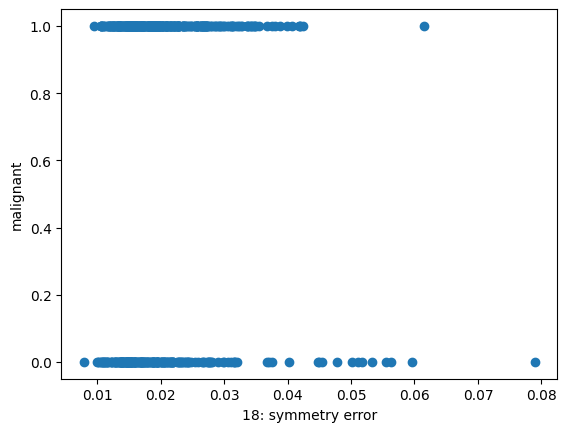

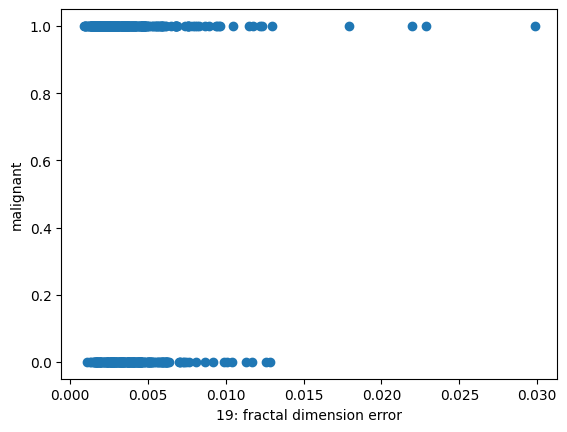

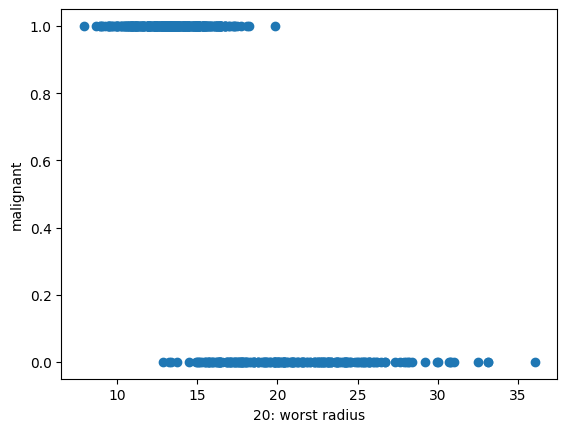

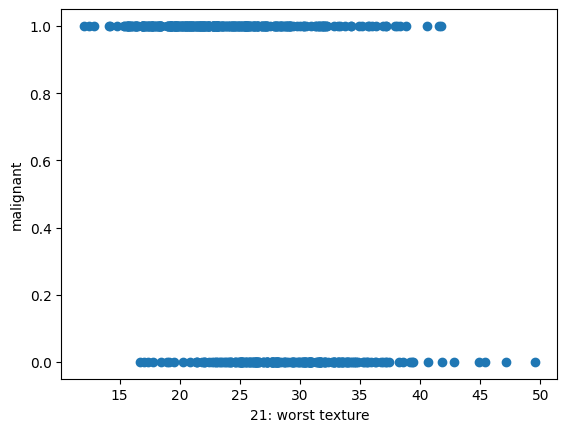

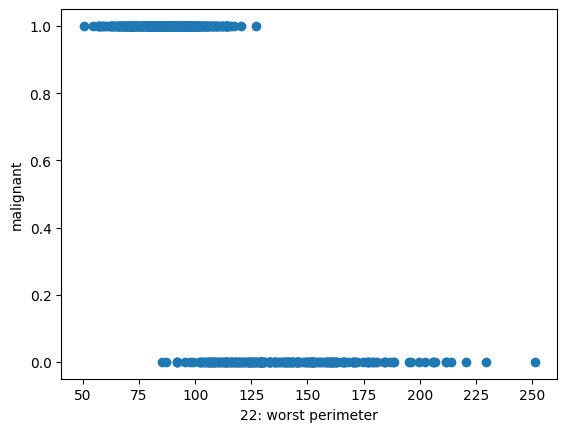

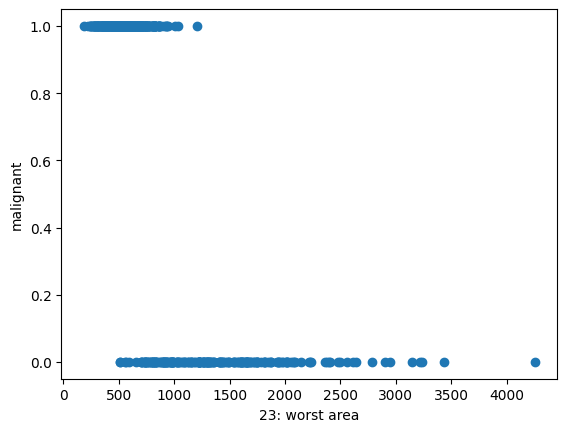

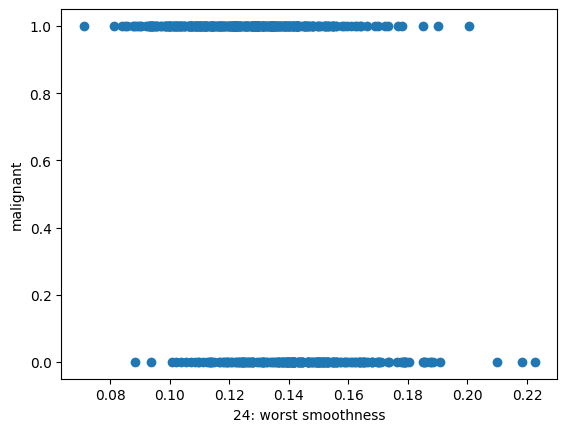

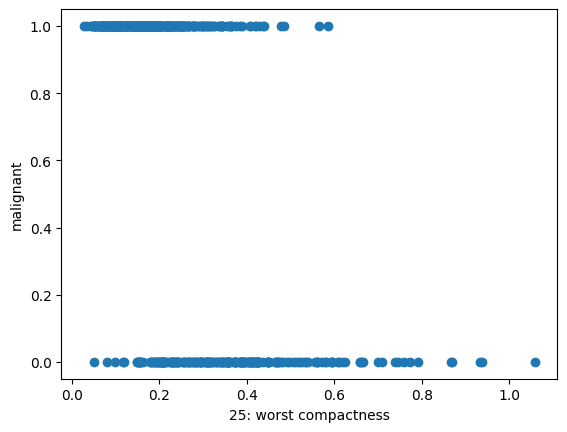

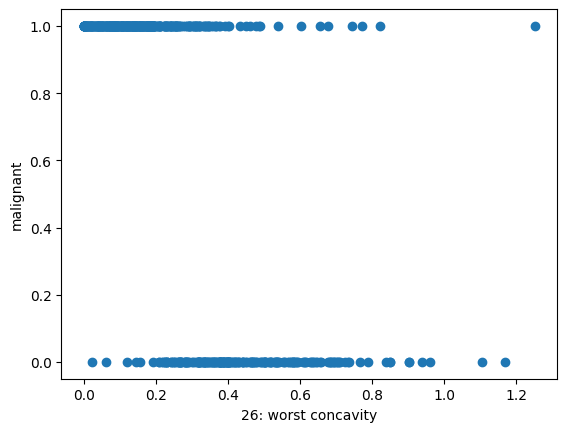

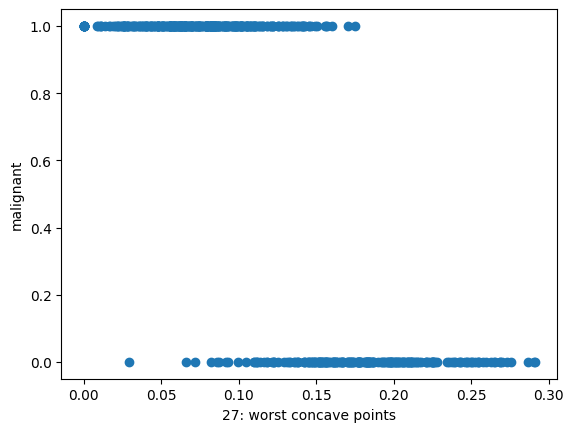

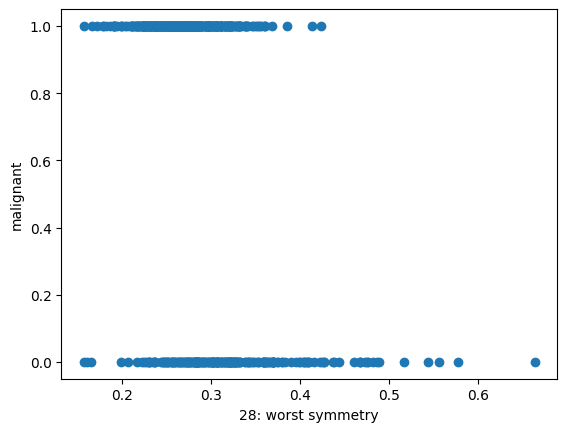

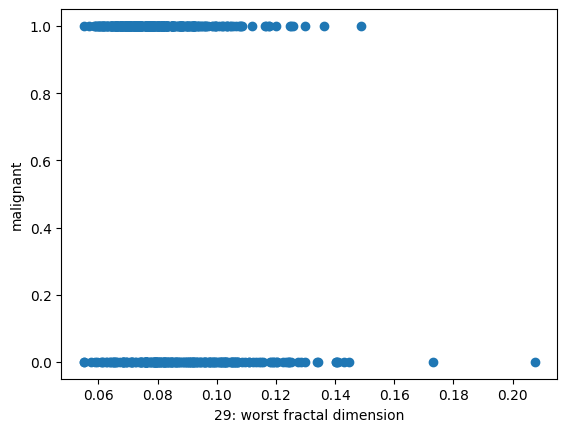

In [4]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
  plt.xlabel(f"{i}: {dataset.feature_names[i]}")
  plt.ylabel(dataset.target_names[0])
  plt.scatter(X[:,i], y)
  plt.show()

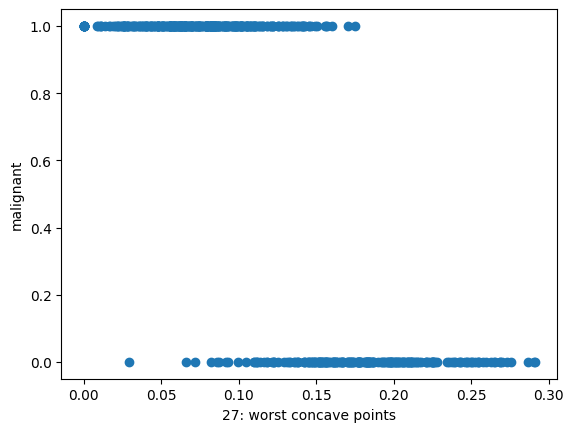

In [5]:
X27 = X[:,27:28]
plt.xlabel(f"{27}: {dataset.feature_names[27]}")
plt.ylabel(dataset.target_names[0])
plt.scatter(X27, y)
plt.show()

In [17]:
import numpy as np
from numpy.linalg import pinv

def addBias(X):
  return np.hstack((np.ones((X.shape[0], 1)), X))

class classificador_linear():
  def fit(self, X, y):
    X = addBias(X)
    self.w = pinv(X.T @ X) @ X.T @ y

  def predict(self, X):
    X = addBias(X)
    return (X @ self.w)


clf = classificador_linear()
clf.fit(X27, y)
ypred = clf.predict(X27)
print(sum(y==(ypred>0.5))/len(y))
# print(y[:10], ypred[:10])

0.9121265377855887


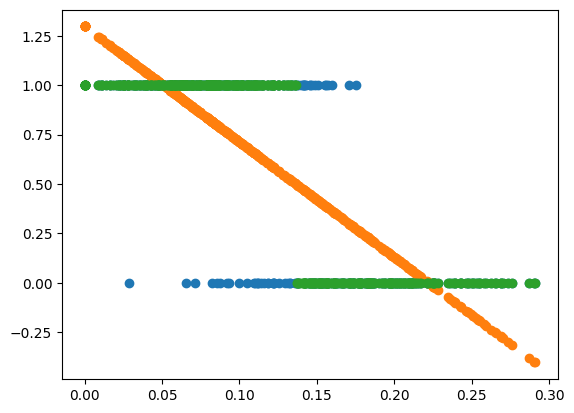

In [19]:
plt.scatter(X27, y)
plt.scatter(X27, ypred)
plt.scatter(X27, ypred>0.5)
plt.show()

In [21]:
acuracia = sum(y==(ypred>0.5))/len(y)
print(f"Acurácia: {acuracia}")

Acurácia: 0.9121265377855887


In [26]:
from sklearn.metrics import mean_squared_error, accuracy_score
print(f"MSE: {mean_squared_error(y, ypred>0.5)}")
print(f"Acurácia: {accuracy_score(y, ypred>0.5)}")

MSE: 0.08787346221441125
Acurácia: 0.9121265377855887


In [27]:
print(mean_squared_error(y, ypred>0.5)+accuracy_score(y, ypred>0.5))

1.0


In [35]:
from sklearn.linear_model import LinearRegression

class classificador_linear():
  def fit(self, X, y):
    self.clf = LinearRegression()
    self.clf.fit(X, y)

  def predict(self, X):
    return self.clf.predict(X)>0.5

clf = classificador_linear()
clf.fit(X, y)
ypred = clf.predict(X)
print(sum(y==ypred)/len(y))
#

0.9648506151142355


In [32]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=9999)
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))

0.9578207381370826


In [45]:
from sklearn.linear_model import SGDClassifier
losses = ['log_loss', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'hinge', 'perceptron', 'huber', 'squared_error', 'modified_huber', 'squared_hinge']
for loss in losses:
  modelo = SGDClassifier(loss=loss)
  modelo.fit(X, y)
  ypred = modelo.predict(X)
  print(f"{loss}: \t{accuracy_score(y, ypred)}")

log_loss: 	0.9103690685413005
squared_epsilon_insensitive: 	0.6854130052724078
epsilon_insensitive: 	0.6274165202108963
hinge: 	0.8963093145869947
perceptron: 	0.9244288224956063
huber: 	0.6274165202108963
squared_error: 	0.37258347978910367
modified_huber: 	0.9121265377855887
squared_hinge: 	0.8717047451669596


In [46]:
from sklearn.linear_model import Perceptron
modelo = Perceptron()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))

0.9261862917398945


In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier
modelo = PassiveAggressiveClassifier()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))

0.9173989455184535


In [48]:
from sklearn.linear_model import RidgeClassifier
modelo = RidgeClassifier()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))

0.9595782073813708


In [49]:
from sklearn.linear_model import RidgeClassifierCV
modelo = RidgeClassifierCV()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))

0.961335676625659


In [53]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))
#

1.0


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9122807017543859


In [65]:
from sklearn.metrics import confusion_matrix
modelo = classificador_linear()
modelo.fit(X_train, y_train)
ypred = modelo.predict(X_test)
print(accuracy_score(y_test, ypred))
print(confusion_matrix(y_test, ypred))

0.956140350877193
[[42  4]
 [ 1 67]]


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        46
           1       0.94      0.99      0.96        68

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred))

0.9436619718309859
0.9852941176470589
0.9640287769784173


In [69]:
y_test_i = y_test * -1 + 1
ypred_i = ypred * -1 + 1
print(classification_report(y_test_i, ypred_i))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.98      0.91      0.94        46

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [71]:
print(precision_score(y_test_i, ypred_i))
print(recall_score(y_test_i, ypred_i))
print(f1_score(y_test_i, ypred_i))

0.9767441860465116
0.9130434782608695
0.9438202247191011


In [59]:
from sklearn.model_selection import cross_validate
modelo = KNeighborsClassifier(n_neighbors=1)
scores = cross_validate(modelo, X, y, cv=5)
print(sum(scores['test_score'])/len(scores['test_score']))

0.9051079024996118


In [64]:
from sklearn.base import BaseEstimator, ClassifierMixin

def addBias(X):
  return np.hstack((np.ones((X.shape[0], 1)), X))

class ClassificadorLinear(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X = addBias(X)
    self.w = pinv(X.T @ X) @ X.T @ y

  def predict(self, X):
    X = addBias(X)
    return (X @ self.w)>0.5

modelo = ClassificadorLinear()
scores = cross_validate(modelo, X, y, cv=5)
print(sum(scores['test_score'])/len(scores['test_score']))

0.9595870206489675


In [88]:
X2 = X[:,27:29]
X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y, test_size=0.2)
modelo = ClassificadorLinear()
modelo.fit(X2_tr, y2_tr)
ypred = modelo.predict(X2_te)
print(accuracy_score(y2_te, ypred))

0.9210526315789473


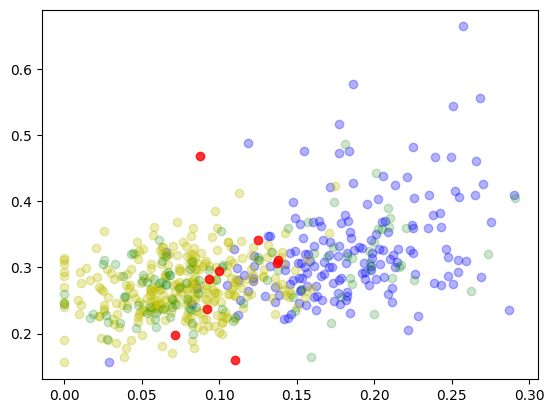

In [91]:
plt.scatter(X2_tr[y2_tr==0,0], X2_tr[y2_tr==0,1], c='b', alpha=0.3)
plt.scatter(X2_tr[y2_tr==1,0], X2_tr[y2_tr==1,1], c='y', alpha=0.3)
plt.scatter(X2_te[ypred==y2_te,0], X2_te[ypred==y2_te,1], c='g', alpha=0.2)
plt.scatter(X2_te[ypred!=y2_te,0], X2_te[ypred!=y2_te,1], c='r', alpha=0.8)
plt.show()

In [104]:
def defineAxes(X):
    offset = 0.1
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

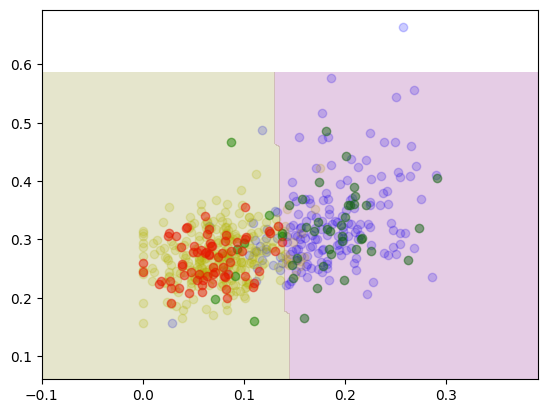

In [105]:
plt.scatter(X2_tr[y2_tr==0,0], X2_tr[y2_tr==0,1], c='b', alpha=0.2)
plt.scatter(X2_tr[y2_tr==1,0], X2_tr[y2_tr==1,1], c='y', alpha=0.2)
plt.scatter(X2_te[0==y2_te,0], X2_te[0==y2_te,1], c='g', alpha=0.5)
plt.scatter(X2_te[1==y2_te,0], X2_te[1==y2_te,1], c='r', alpha=0.5)
plotPredictions(modelo, X2_te)
plt.show()